# data cleaning

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Users\ADMIN\Documents\students_dataset_updated.csv")
dataset.head()

,student_id,name,age,test_score,grade,attendance_percentage,department
0,1,Alice,20.0,85.0,A,95.5,Computer Science
1,2,NaN,78.0,NaN,NaN,NaN,NaN
2,3,Charlie,21.0,NaN,B,92.5,Physics
3,4,David,19.0,92.0,A,NaN,Biology
4,5,Emma,22.0,65.0,C,85.5,NaN


In [10]:
dataset.isnull().sum()

student_id               0
name                     0
age                      0
test_score               0
grade                    0
attendance_percentage    0
department               0
dtype: int64

In [4]:
dataset.fillna({"name": dataset["name"].mode()[0]}, inplace=True)

In [5]:
dataset.columns = dataset.columns.str.strip()
dataset.fillna({"grade": dataset["grade"].mode()[0]}, inplace=True)

In [6]:
dataset.fillna({"age": dataset["age"].mode()[0]}, inplace=True)

In [7]:
dataset.fillna({"test_score": dataset["test_score"].mode()[0]}, inplace=True)

In [8]:
dataset.fillna({"attendance_percentage": dataset["attendance_percentage"].mode()[0]}, inplace=True)

In [9]:
dataset.fillna({"department": dataset["department"].mode()[0]}, inplace=True)

In [19]:
pv_data = dataset[["grade", "age"]]   # ENCODEING
pv_data

,grade,age
0,A,20.0
1,A,78.0
2,B,21.0
3,A,19.0
4,C,22.0
...,...,...
95,C,20.0
96,A,23.0
97,B,22.0
98,C,19.0


In [24]:
pd.get_dummies(pv_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      100 non-null    float64
 1   grade_A  100 non-null    bool   
 2   grade_B  100 non-null    bool   
 3   grade_C  100 non-null    bool   
dtypes: bool(3), float64(1)
memory usage: 1.2 KB


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
fg=OneHotEncoder(drop="first")
fg.fit_transform(pv_data)     # to see, analyze , and transform data.
                            # SPARSE MATRIX - columns are filled with 0 and 1.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 137 stored elements and shape (100, 12)>

In [34]:
fg=OneHotEncoder()
rv=fg.fit_transform(pv_data).toarray()

In [35]:
df = pd.DataFrame(rv[:, :3], columns=["grade_A", "grade_B", "grade_C"])
df

,grade_A,grade_B,grade_C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
95,0.0,0.0,1.0
96,1.0,0.0,0.0
97,0.0,1.0,0.0
98,0.0,0.0,1.0


# Label Encoding  -  Nominal- not having connections or sequence.,  - ordinal- having sequence in data.

In [36]:
import pandas as pd

In [38]:
df = pd.DataFrame ({"name": ["netmax", "railway", "cow", "wood","party"]})
df

,name
0,netmax
1,railway
2,cow
3,wood
4,party


In [39]:
from sklearn.preprocessing import LabelEncoder

In [46]:
vc=LabelEncoder()
df["fg_name"]=vc.fit_transform(df["name"])      # used to deploy

In [47]:
df

,name,fg_name
0,netmax,1
1,railway,3
2,cow,0
3,wood,4
4,party,2


In [49]:
data=pd.read_csv(r"C:\Users\ADMIN\Documents\students_dataset_updated.csv")
data.head(3)

,student_id,name,age,test_score,grade,attendance_percentage,department
0,1,Alice,20.0,85.0,A,95.5,Computer Science
1,2,NaN,78.0,NaN,NaN,NaN,NaN
2,3,Charlie,21.0,NaN,B,92.5,Physics


In [56]:
data["attendance_percentage"].unique()

array([19, 23, 13,  0,  5, 22, 10,  3, 20,  8, 14,  6, 18, 16,  9, 21,  4,
       15,  7, 17, 12,  2, 11,  1])

In [51]:
la = LabelEncoder()
la.fit(data["attendance_percentage"])

LabelEncoder()

In [52]:
la.transform(dataset["attendance_percentage"])

array([19, 23, 13, 23,  0,  5, 23, 22, 23, 10,  3, 23, 23, 23, 20,  8, 14,
        6, 23, 18, 23, 13, 16,  9, 23, 21,  4, 23, 15,  7, 23, 17, 10, 23,
       23, 12,  2, 18, 11, 23, 16,  8, 23,  9,  3, 15, 23,  6, 18, 10, 12,
        4, 23, 16,  7, 11, 23,  1, 14, 19,  9, 23, 23,  8, 16,  5, 12, 23,
        4, 14, 23, 10,  7, 12, 23,  4, 16, 10, 18, 23, 12,  8, 14,  5, 17,
        9, 23, 13,  3, 23, 18, 23, 10,  5, 12, 23, 16,  8,  3, 15])

In [54]:
data["attendance_percentage"] = la.transform(dataset["attendance_percentage"])

# OUTLIERS - out of range

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
dataset=pd.read_csv(r"C:\Users\ADMIN\Documents\student_scores.csv")
dataset.head()

,StudyHours,Attendance,AssignmentsCompleted,ExamScore
0,5,80,8,65
1,7,85,10,72
2,3,70,5,55
3,9,90,12,80
4,6,75,7,68


In [24]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            50 non-null     int64
 1   Attendance            50 non-null     int64
 2   AssignmentsCompleted  50 non-null     int64
 3   ExamScore             50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


StudyHours              0
Attendance              0
AssignmentsCompleted    0
ExamScore               0
dtype: int64

In [25]:
dataset.describe()

,StudyHours,Attendance,AssignmentsCompleted,ExamScore
count,50.000000,50.000000,50.000000,50.00000
mean,7.200000,82.000000,9.660000,72.08000
std,3.194383,11.264899,3.841821,12.28877
min,2.000000,60.000000,4.000000,50.00000
25%,5.000000,73.250000,6.250000,62.25000
50%,7.000000,83.500000,9.000000,72.50000
75%,9.000000,91.750000,12.750000,81.75000
max,14.000000,99.000000,18.000000,93.00000


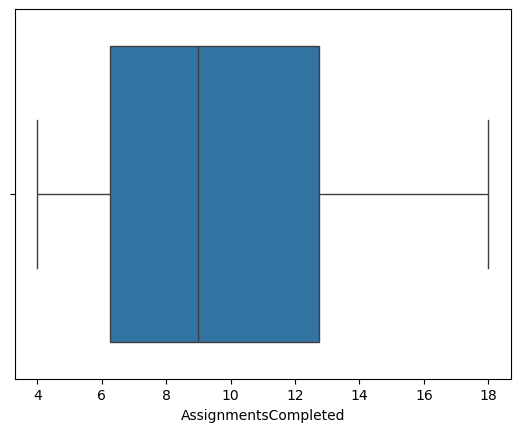

In [26]:
sns.boxplot(x="AssignmentsCompleted", data=dataset)
plt.show()

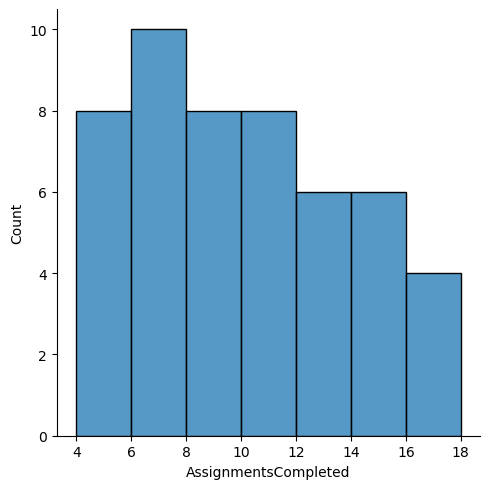

In [27]:
sns.displot(dataset["AssignmentsCompleted"])
plt.show()

In [28]:
dataset.shape

(50, 4)

In [40]:
q1=dataset["ExamScore"].quantile(0.25)
q3=dataset["ExamScore"].quantile(0.75)

In [41]:
Q1=np.percentile(dataset, 25)
Q1

np.float64(8.0)

In [42]:
Q3=np.percentile(dataset, 75)
Q3

np.float64(78.0)

In [43]:
IQR=Q3-Q1
IQR

np.float64(70.0)

In [44]:
min_range = Q1- 1.5 * IQR
min_range

np.float64(-97.0)

In [45]:
max_range = Q3- 1.5 * IQR
max_range

np.float64(-27.0)

In [47]:
new_dataset = dataset[dataset["ExamScore"]<=max_range]
new_dataset.shape

(0, 4)